In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import maxwell
import math

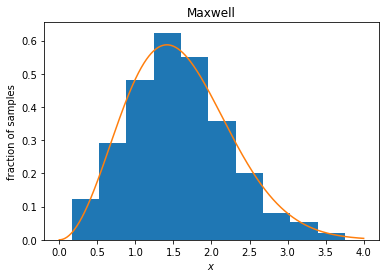

In [41]:
# построение гистограммы выборки и теоретической плотности распределения Максвелла.
a = 1
b = 0

maxwell_rv = maxwell(b,a)
sample = maxwell_rv.rvs(1000,10)
plt.hist(sample, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title('Maxwell')
x = np.linspace(0,4,1000)
pdf = maxwell_rv.pdf(x) # плотность распределения
plt.plot(x, pdf)

In [4]:
#Считаем дисперсию и матожидание
variance = a*a*(3*math.pi - 8)/math.pi
expectancy = 2*a*math.sqrt(2/math.pi)
print('variance = ' + str(variance) + ' expectancy = ' + str(expectancy))

variance = 0.45352091053 expectancy = 1.59576912161


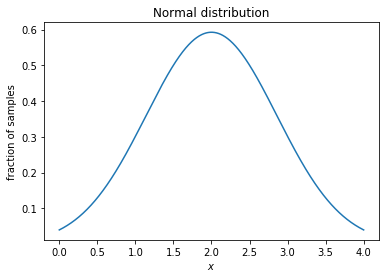

In [42]:
#Считаем параметры нормального распределения, к которому будет приближаться распределение выборочных средних
norm_variance=math.sqrt(variance)
norm_rv = sts.norm(expectancy,norm_variance)
norm_x = np.linspace(norm_rv.ppf(0.01), norm_rv.ppf(0.99), 1000)
norm_pdf = norm_rv.pdf(norm_x)
plt.title('Normal distribution')
plt.plot(x, norm_pdf)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.show()

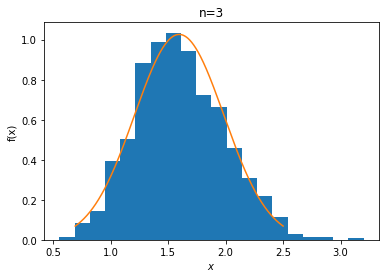

In [37]:
#Гистограмма выборочных средних для выборки из 3 элементов
d = np.ones(1000) #Я, к сожалению, не знаю, как создавать динамически заполняющиеся массивы. Поэтому просто перезаполняю значения массива, состоящего из 1000 единиц
#Если Вы знаете, как можно сразу записывать в новый массив, то напишите это в комментариях к работе.
i = 0
n=3
while i<1000:
    d[i] = maxwell_rv.rvs(n).mean()
    i +=1
plt.hist(d, normed=True,bins = 20)
plt.ylabel('f(x)')
plt.xlabel('$x$')
plt.title('n=' + str(n))
norm_otkl=math.sqrt(variance/n)
norm_rv = sts.norm(expectancy,norm_otkl)
norm_x = np.linspace(norm_rv.ppf(0.01), norm_rv.ppf(0.99), 1000)
norm_pdf = norm_rv.pdf(norm_x)
plt.plot(norm_x,norm_pdf)


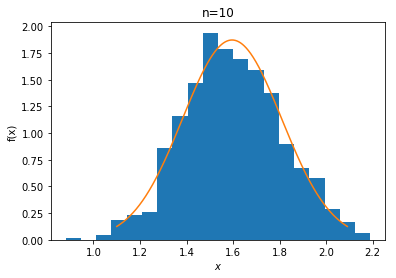

In [38]:
#Гистограмма выборочных средних для выборки из 10 элементов
n=10
e = np.ones(1000)
i = 0
while i<1000:
    e[i] = maxwell_rv.rvs(n).mean()
    i +=1
plt.hist(e, normed=True,bins = 20)
plt.ylabel('f(x)')
plt.xlabel('$x$')
plt.title('n=' + str(n))
norm_otkl=math.sqrt(variance/n)
norm_rv = sts.norm(expectancy,norm_otkl)
norm_x = np.linspace(norm_rv.ppf(0.01), norm_rv.ppf(0.99), 1000)
norm_pdf = norm_rv.pdf(norm_x)
plt.plot(norm_x,norm_pdf)

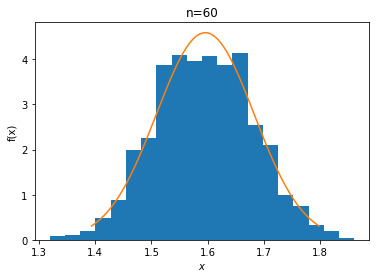

In [39]:
#Гистограмма выборочных средних для выборки из 60 элементов
n=60
f = np.ones(1000) 
i = 0
while i<1000:
    f[i] = maxwell_rv.rvs(n).mean()
    i +=1
plt.hist(f, normed=True,bins = 20)
plt.ylabel('f(x)')
plt.xlabel('$x$')
plt.title('n=' + str(n))
norm_otkl=math.sqrt(variance/n)
norm_rv = sts.norm(expectancy,norm_otkl)
norm_x = np.linspace(norm_rv.ppf(0.01), norm_rv.ppf(0.99), 1000)
norm_pdf = norm_rv.pdf(norm_x)
plt.plot(norm_x,norm_pdf)

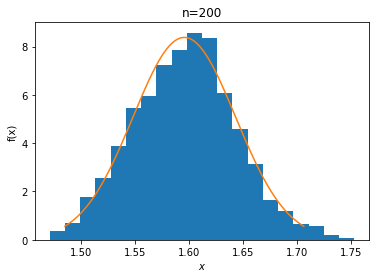

In [36]:
#Гистограмма выборочных средних для выборки из 200 элементов
n=200
f = np.ones(1000) 
i = 0
while i<1000:
    f[i] = maxwell_rv.rvs(n).mean()
    i +=1
plt.hist(f, normed=True,bins = 20)
plt.ylabel('f(x)')
plt.xlabel('$x$')
plt.title('n=' + str(n))
norm_otkl=math.sqrt(variance/n)
norm_rv = sts.norm(expectancy,norm_otkl)
norm_x = np.linspace(norm_rv.ppf(0.01), norm_rv.ppf(0.99), 1000)
norm_pdf = norm_rv.pdf(norm_x)
plt.plot(norm_x,norm_pdf)

Построив гистограммамы выборок выборочных средних различного объема(3,10,60,200), мы убедились, что точность аппроксимации увеличивается, когда увеличивается объем выборки, о чем и гласит ЦПТ.